# Estandarización, covarianza y correlación

In [1]:
import numpy as np
import pandas as pd
import scipy.stats

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('iris-data.csv', index_col=0)

In [3]:
df.columns

Index(['lar.sepalo', 'anc.sepalo', 'lar.petalo', 'anc.petalo', 'tipo_flor'], dtype='object')

In [4]:
df.tipo_flor.value_counts()

2.0    50
1.0    50
0.0    50
Name: tipo_flor, dtype: int64

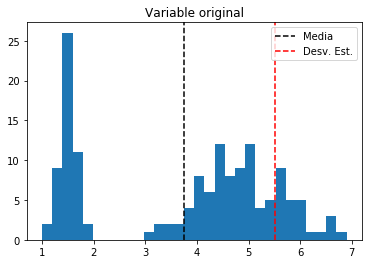

In [5]:
y = df['lar.petalo']
fig, axis = plt.subplots()
axis.set_title('Variable original')
axis.hist(y, bins=30)
axis.axvline(x = np.mean(y), c='k', label='Media', linestyle='--')
axis.axvline(x = np.mean(y) + np.std(y), c='r', label='Desv. Est.', linestyle='--')
axis.legend()

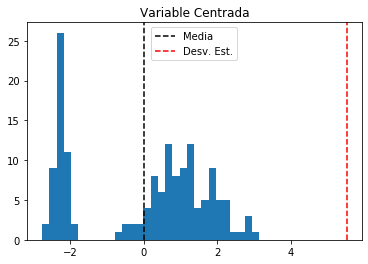

In [6]:
# Primero centramos la variable, para ello, se debe restar el valor de la media a cada uno de los valores de Y.
y = df['lar.petalo']
fig, axis = plt.subplots()
axis.set_title('Variable Centrada')
axis.hist(y- np.mean(y), bins=30)
axis.axvline(x = np.mean(y - np.mean(y)), c='k', label='Media', linestyle='--')
axis.axvline(x = np.mean(y) + np.std(y), c='r', label='Desv. Est.', linestyle='--')
axis.legend()

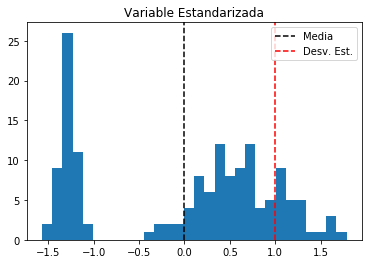

In [7]:
# Reducción de la variable
y = df['lar.petalo']
fig, axis = plt.subplots()
axis.set_title('Variable Estandarizada')
axis.hist((y - np.mean(y))/np.std(y), bins=30)
axis.axvline(x = np.mean((np.mean(y - np.mean(y))/np.std(y))), c='k', label='Media', linestyle='--')
axis.axvline(x = np.mean((np.mean(y - np.mean(y))/np.std(y))) + np.std((y - np.mean(y))/np.std(y)), c='r', label='Desv. Est.', linestyle='--')
axis.legend()

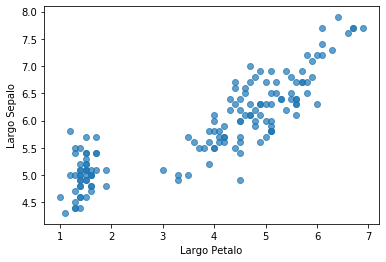

In [8]:
fig, axis = plt.subplots()
axis.scatter(df['lar.petalo'], df['lar.sepalo'], alpha=0.7)
axis.set_xlabel('Largo Petalo')
axis.set_ylabel('Largo Sepalo')
axis.autoscale()

In [9]:
np.cov(df['lar.petalo'], df['lar.sepalo'])
# El resultado es una matriz de 2x2. Es una matriz de covarianza.
# La Relación son las variables en las posiciones (0,1)(1,0) 
# Las variables en las posiciones (0,0)(1,1) son las varianza de cada una de las variables individuales.
# Lo que podemos leer de esto, es que son variables de relación positiva de magnitud 1.2.

array([[3.11627785, 1.27431544],
       [1.27431544, 0.68569351]])

In [10]:
# Correlación de la magnitud de la fuerza
df.corr(method = 'spearman')
# La correlación entre largo sepalo y el largo del petalo es fuerte, ya que se apróxima bastante a 1.

,lar.sepalo,anc.sepalo,lar.petalo,anc.petalo,tipo_flor
lar.sepalo,1.000000,-0.166778,0.881898,0.834289,0.798078
anc.sepalo,-0.166778,1.000000,-0.309635,-0.289032,-0.440290
lar.petalo,0.881898,-0.309635,1.000000,0.937667,0.935431
anc.petalo,0.834289,-0.289032,0.937667,1.000000,0.938179
tipo_flor,0.798078,-0.440290,0.935431,0.938179,1.000000


In [11]:
corr = df.corr(method = 'spearman')

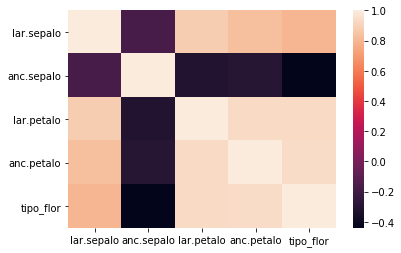

In [12]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels = corr.columns)

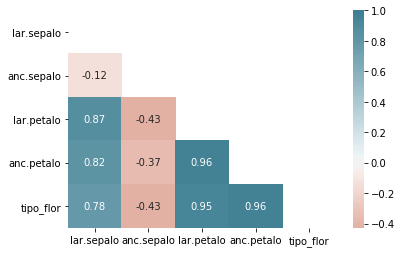

In [13]:
# Haciendo más entendible el gráfico.
plt.subplots()
mask = np.zeros_like(df.corr(), dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df.corr(), cmap = sns.diverging_palette(20, 220, n = 200), mask = mask, annot = True, center = 0)

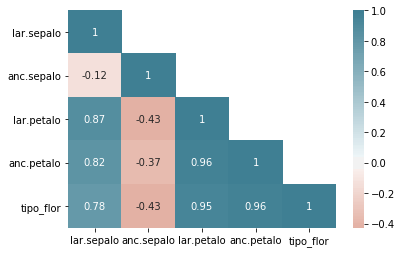

In [14]:
# Dejando la diagonal principal, a modo de delimitador
corrK = df.corr(method='kendall')
mask = np.zeros_like(corrK, dtype = np.bool)
mask[np.triu_indices(len(corrK), 1)] = True
sns.heatmap(df.corr(), cmap = sns.diverging_palette(20, 220, n = 200), mask = mask, annot = True, center = 0)

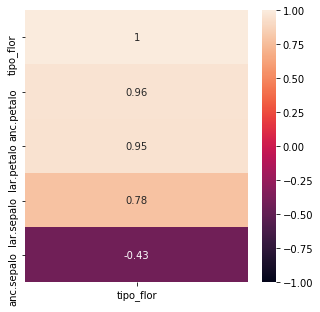

In [15]:
# Ordenando por el tipo de flor
plt.figure(figsize=(5,5))
sns.heatmap(df.corr()[['tipo_flor']].sort_values(by=['tipo_flor'], ascending=False).head(50), vmin=-1, annot=True)